In [12]:
import pandas

In [13]:
df=pandas.read_csv("scmp2018.csv")

In [14]:
dfc=df["datetime"]=="2018-11-30"
df0701=df[dfc]
df0701

,Unnamed: 0,title,byline,dates,datetime
10141,3722,Hong Kong needs to improve the administration ...,NaN,30 Nov 2018,2018-11-30
10142,3716,Mainland constitution 'applies in the city': I...,NaN,30 Nov 2018,2018-11-30
10143,3717,Xi and Trump's make-or-break chance in Argenti...,NaN,30 Nov 2018,2018-11-30
10144,3720,Hong Kong's film and TV industry after 40 year...,NaN,30 Nov 2018,2018-11-30
10145,3719,"A day out in Shenzhen, with food, shopping and...",NaN,30 Nov 2018,2018-11-30
10146,3721,China needs to fix itself before asking that H...,NaN,30 Nov 2018,2018-11-30
10147,3715,How China's economic reformers are using US tr...,NaN,30 Nov 2018,2018-11-30
10148,3718,Xi Jinping targets grass roots in push to exte...,NaN,30 Nov 2018,2018-11-30
10149,3714,Hats off to them,NaN,30 Nov 2018,2018-11-30
10150,3707,Credit reporting agency TransUnion suspends on...,NaN,30 Nov 2018,2018-11-30


In [27]:
from collections import Counter

Counter(" ".join(df0701["title"]).split(" ")).items()

dict_items([('Hong', 21), ('Kong', 17), ('needs', 3), ('to', 38), ('improve', 1), ('the', 30), ('administration', 1), ('of', 20), ('its', 2), ('vaccines', 1), ('Mainland', 1), ('constitution', 1), ("'applies", 1), ('in', 28), ("city':", 1), ('In', 2), ('an', 4), ('essay,', 1), ('Wang', 1), ('Zhenmin', 1), ('says', 5), ('Basic', 1), ('Law', 1), ('is', 4), ('a', 12), ('supplement', 1), ('national', 1), ('charter', 1), ('Xi', 4), ('and', 27), ("Trump's", 1), ('make-or-break', 1), ('chance', 1), ('Argentina', 2), ('for', 14), ('trade', 4), ('war', 3), ('ceasefire:', 1), ('Trade', 1), ('that', 3), ('has', 1), ('spilled', 1), ('over', 4), ('into', 2), ('geopolitics', 1), ('overshadows', 1), ('meeting', 2), ('may', 2), ('derail', 1), ('it', 5), ("Kong's", 3), ('film', 2), ('TV', 1), ('industry', 1), ('after', 6), ('40', 1), ('years', 2), ("China's", 4), ('opening', 2), ('up', 2), ('reform:', 1), ('once', 2), ("'Hollywood", 1), ("East',", 1), ('does', 1), ('future', 1), ('now', 2), ('lie', 1),

In [15]:
titlelist=df0701["title"].tolist()

In [16]:
f = open('2018G20scmp.txt','w')
for i in range(len(titlelist)):
    f.write(titlelist[i])
f.close()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import imageio
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 

def getText(txt):
    text=open(txt,"r").read() 
    text=text.lower()                 
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>':
        text=text.replace(ch," ")  
    return text

def remove_stopwords(words):
    processed_word_list = []
    for word in words:
        word = word.lower() # in case they arenet all lower cased
        if word not in stopwords:
            processed_word_list.append(word)
    return processed_word_list

In [18]:
def word_count(processed_word_list):
    word_count = pandas.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:20]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="BuPu_r")  
    plt.title('SCMP Top20')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    #plt.savefig('/Users/xuyucan/SCMP词频统计.png',dpi=400)  
    plt.show() 

In [19]:
def tag_cloud(text):
    image = Image.open(r'./picture.jpg')
    graph = np.array(image)
    wc = WordCloud(mode='RGBA',background_color='white',max_words=2000,stopwords=stopwords,max_font_size=300,random_state=42,mask=graph)
    wc.generate(' '.join(text))
    img = imageio.imread(r"\users\xuwen\venv\test\ppp.jpg") 
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))
    cloud_colors.default_color = [0.6,0.6,0.6]
    wc.recolor(color_func=cloud_colors)
    #wc.to_file(r"/Users/xuyucan/SCMP_tagcloud.png") 
    plt.figure(figsize=(12,12))
    plt.imshow(wc.recolor(color_func=cloud_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title('SCMP', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

In [20]:
stopwords = stopwordslist('./stopwords.txt')
stopwords
newstopwords = ["go","'the",'will','with',"in","china","kong","''china's","world","china's","amid","Chinese","china's","hongkong","says","say","hong","kong","kong's"]
stopwords.extend(newstopwords)
stopwords

['!!',
 '?!',
 '??',
 '!?',
 '`',
 '``',
 "''",
 '-lrb-',
 '-rrb-',
 '-lsb-',
 '-rsb-',
 ',',
 '.',
 ':',
 ';',
 '"',
 "'",
 '?',
 '<',
 '>',
 '{',
 '}',
 '[',
 ']',
 '+',
 '-',
 '(',
 ')',
 '&',
 '%',
 '$',
 '@',
 '!',
 '^',
 '#',
 '*',
 '..',
 '...',
 "'ll",
 "'s",
 "'m",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 

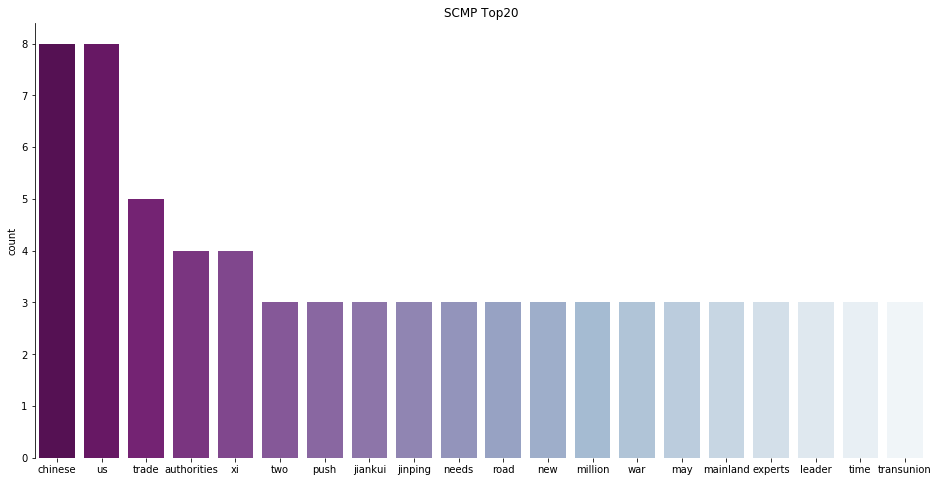

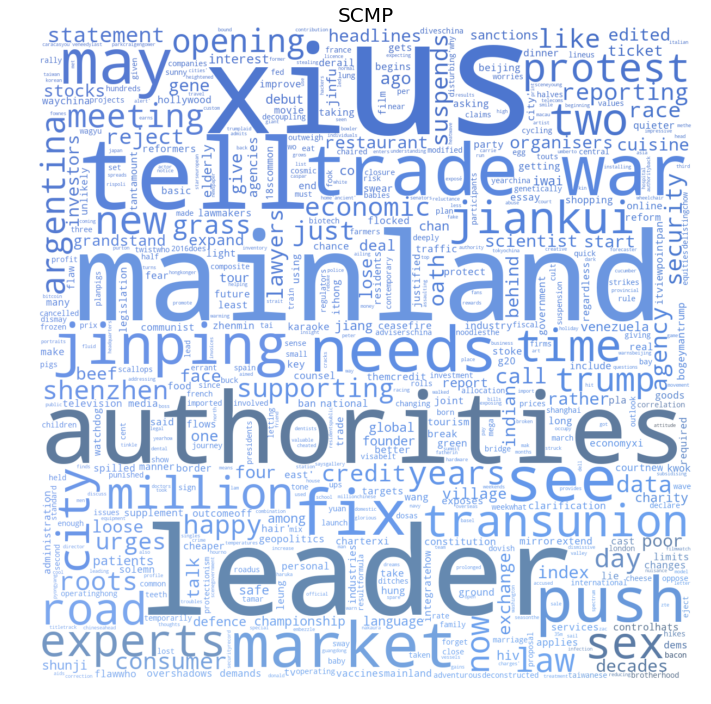

In [21]:
test=getText('./2018G20scmp.txt')  
words=test.split()
processed_word_list = remove_stopwords(words)
word_count(processed_word_list)
tag_cloud(processed_word_list)

c:\users\xuwen\venv\test\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


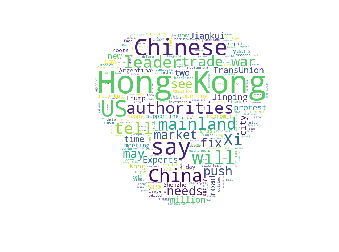

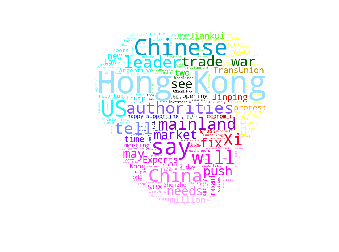

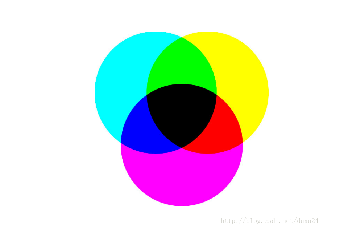

In [40]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

d = path.dirname('.')

# Read the whole text.
text = open("./2018G20scmp.txt").read()



# 设置背景图片
RGB_coloring = imread(path.join(d, "sansetu.png"))
# 设置参数：背景颜色,词云显示的最大词数，设置背景图片，字体最大值
wc = WordCloud(background_color="white",max_words=200,mask=RGB_coloring,stopwords=STOPWORDS.add("said"),max_font_size=180, random_state=42)
# generate word cloud
wc.generate(text)

#  从背景图片生成颜色值
image_colors = ImageColorGenerator(RGB_coloring)

# show
plt.imshow(wc)
plt.axis("off")
#绘制词云
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(RGB_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [22]:
e

NameError: name 'e' is not defined